# Notes on Machine Learning Techniques

In [1]:
%matplotlib inline

from tqdm.auto import tqdm
from matplotlib import pyplot as plt, cm

import numpy as np
from scipy import linalg 

from sklearn import datasets as ds, model_selection as ms, metrics
from sklearn import linear_model as lm, neighbors, naive_bayes as nb, svm
from sklearn import tree, ensemble


## Supervised Machine Learning

In [28]:
@np.vectorize
def color_encode(y):
    return "blue" if y == 0 else "green"

def get_line(coef_, intercept_, X, thr=0.5):
    c0, c1 = coef_[0, 0], coef_[0, 1]
    X0 = np.array([X[:, 0].min(), X[:, 0].max()])
    X1 = (-intercept_ + thr - c0 * X0)/c1
    return X0, X1

def get_contour(clf, x0range=(-3, 3), x1range=(-3, 3), alpha=0.5, ax=plt):
    xx = np.linspace(x0range[0], x0range[1])
    yy = np.linspace(x1range[0], x1range[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(xy).reshape(XX.shape)
    else:
        Z = clf.predict_proba(xy)[:, 1].reshape(XX.shape)
    ax.contourf(XX, YY, Z, cmap=cm.coolwarm, alpha=alpha)
    return XX, YY, Z

### Linear Models

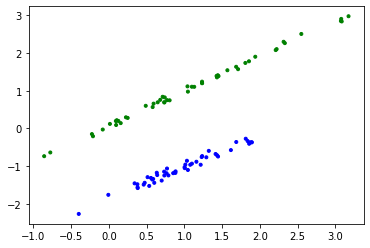

In [3]:
X, y = ds.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, flip_y=0.00, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=color_encode(y), marker=".")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



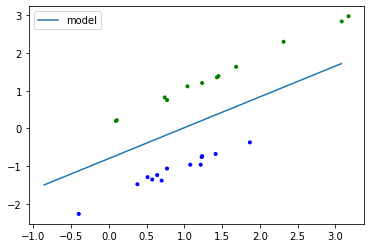

In [7]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y)

clf_linear_model = lm.LogisticRegression(penalty="none", random_state=42, max_iter=1000, n_jobs=2)
clf_linear_model.fit(tr_X, tr_y)
pred_y = clf_linear_model.predict(ts_X)

print (metrics.classification_report(ts_y, pred_y))

plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")
X0, X1 = get_line(clf_linear_model.coef_, clf_linear_model.intercept_, tr_X)
plt.plot(X0, X1, label="model")
plt.legend()
plt.show()

There are $\infty$ equally-good linear models derived this way.

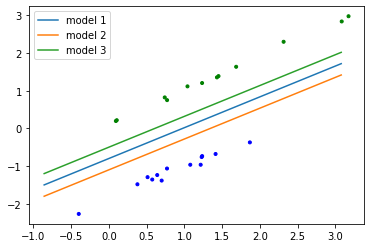

In [8]:
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")
X0, X1 = get_line(clf_linear_model.coef_, clf_linear_model.intercept_, tr_X)
plt.plot(X0, X1, label="model 1")
plt.plot(X0, X1 - 0.3, label="model 2")
plt.plot(X0, X1 + 0.3, label="model 3")
plt.legend()
plt.show()

### Support Vector Classifiers

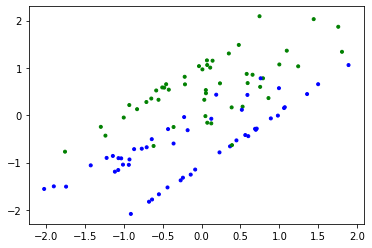

In [9]:
X, y = ds.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, flip_y=0.03, class_sep=0.5, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=color_encode(y), marker=".")
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.91      0.77      0.83        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



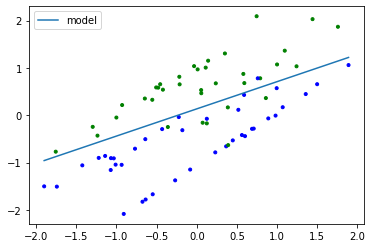

In [10]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_linear_model = lm.LogisticRegression(penalty="none", random_state=42, max_iter=1000, n_jobs=2)
clf_linear_model.fit(tr_X, tr_y)
pred_y = clf_linear_model.predict(ts_X)

print (metrics.classification_report(ts_y, pred_y))

plt.scatter(tr_X[:, 0], tr_X[:, 1], c=color_encode(tr_y), marker=".")
X0, X1 = get_line(clf_linear_model.coef_, clf_linear_model.intercept_, tr_X)
plt.plot(X0, X1, label="model")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.91      0.77      0.83        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

[[11  1]
 [ 3 10]]


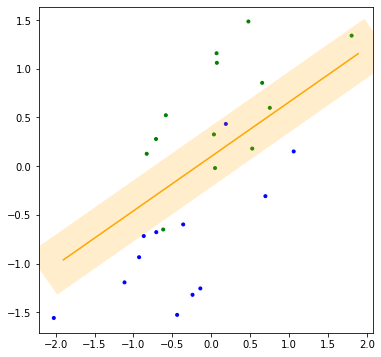

In [11]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_svc = svm.LinearSVC(penalty="l2", loss="hinge", C=1, random_state=42, max_iter=1000)
clf_svc.fit(tr_X, tr_y)
pred_y = clf_linear_model.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))
print (metrics.confusion_matrix(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")
X0, X1 = get_line(clf_svc.coef_, clf_svc.intercept_, tr_X, thr=0)
plt.plot(X0, X1 , linewidth=50, alpha=0.2, c="orange")
plt.plot(X0, X1 , c="orange")
plt.show()

### Support Vector Machines

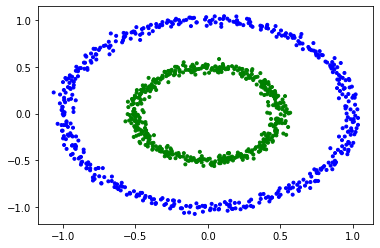

In [12]:
X, y = ds.make_circles(n_samples=1000, random_state=42, noise=0.0314, factor=0.5)

plt.scatter(X[:, 0], X[:, 1], c=color_encode(y), marker=".")
plt.show()

              precision    recall  f1-score   support

           0       0.57      0.40      0.47       129
           1       0.52      0.69      0.59       121

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.53       250
weighted avg       0.55      0.54      0.53       250

[[51 78]
 [38 83]]


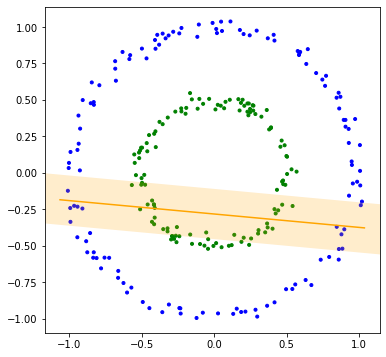

In [13]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_svc = svm.LinearSVC(penalty="l2", loss="hinge", C=1, random_state=42, max_iter=1000)
clf_svc.fit(tr_X, tr_y)
pred_y = clf_svc.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))
print (metrics.confusion_matrix(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")
X0, X1 = get_line(clf_svc.coef_, clf_svc.intercept_, tr_X, thr=0)
plt.plot(X0, X1 , linewidth=50, alpha=0.2, c="orange")
plt.plot(X0, X1 , c="orange")
plt.show()

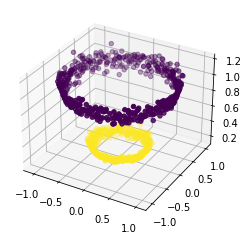

In [14]:
X2 = X[:, 0]**2 + X[:, 1]**2
X_ = np.hstack((X, X2.reshape(-1, 1)))

ax = plt.subplot(projection="3d")
ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], c=y)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[129   0]
 [  0 121]]


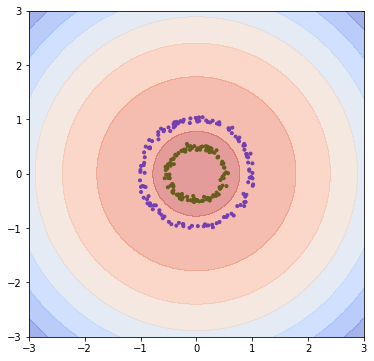

In [16]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_svm = svm.SVC(kernel="poly", degree=2, gamma="auto", max_iter=1000)
clf_svm.fit(tr_X, tr_y)
pred_y = clf_svm.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))
print (metrics.confusion_matrix(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")

get_contour(clf_svm)

plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[129   0]
 [  0 121]]


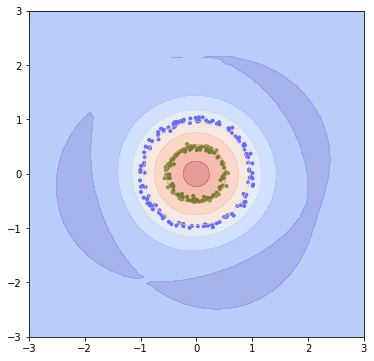

In [17]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_svm_rbf = svm.SVC(kernel="rbf", degree=2, gamma="auto", max_iter=1000)
clf_svm_rbf.fit(tr_X, tr_y)
pred_y = clf_svm_rbf.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))
print (metrics.confusion_matrix(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")

get_contour(clf_svm_rbf)

plt.show()

### K-Nearest Neighbors

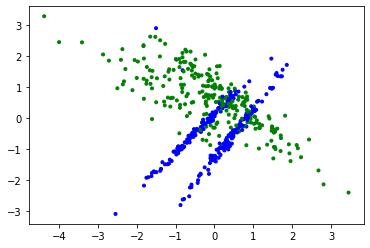

In [20]:
X, y = ds.make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, flip_y=0.03, class_sep=0.5, random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=color_encode(y), marker=".")
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        66
           1       0.95      0.88      0.91        59

    accuracy                           0.92       125
   macro avg       0.92      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125

[[63  3]
 [ 7 52]]


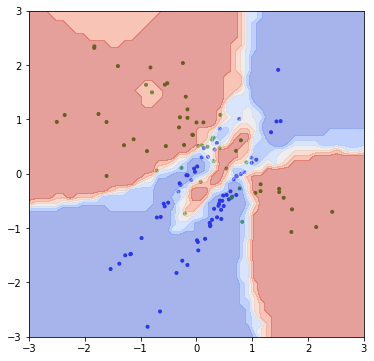

In [29]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", p=2, metric="minkowski", n_jobs=2)
clf_knn.fit(tr_X, tr_y)
pred_y = clf_knn.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")

get_contour(clf_knn)

plt.show()

### Decision Trees

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        66
           1       0.87      0.81      0.84        59

    accuracy                           0.86       125
   macro avg       0.86      0.85      0.85       125
weighted avg       0.86      0.86      0.86       125



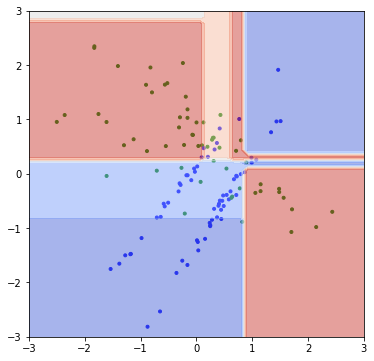

In [31]:
tr_X, ts_X, tr_y, ts_y = ms.train_test_split(X, y, random_state=42)

clf_knn = tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=4, max_leaf_nodes=64, random_state=42)
clf_knn.fit(tr_X, tr_y)
pred_y = clf_knn.predict(ts_X)
print (metrics.classification_report(ts_y, pred_y))

_ = plt.figure(figsize=(6, 6))
plt.scatter(ts_X[:, 0], ts_X[:, 1], c=color_encode(ts_y), marker=".")

get_contour(clf_knn)

plt.show()